### DATA EXPLORATION

In [47]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')


In [48]:
df = pd.read_csv('Walmart DataSet.csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [49]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [51]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [53]:
df.head(5).T

0           1           2           3           4
Store                  1           1           1           1           1
Date          05-02-2010  12-02-2010  19-02-2010  26-02-2010  05-03-2010
Weekly_Sales   1643690.9  1641957.44  1611968.17  1409727.59  1554806.68
Holiday_Flag           0           1           0           0           0
Temperature        42.31       38.51       39.93       46.63        46.5
Fuel_Price         2.572       2.548       2.514       2.561       2.625
CPI           211.096358   211.24217  211.289143  211.319643  211.350143
Unemployment       8.106       8.106       8.106       8.106       8.106

In [54]:
# Reframing the columns

df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year
 
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  weekday  month  year  
0  211.096358         8.106        6      5  2010  
1  211.242170         8.106        3     12  2010  
2  211.289143         8.106        4      2  2010  
3  211.319643         8.106        4      2  2010  
4  211.350143         8.106        0      5  2010

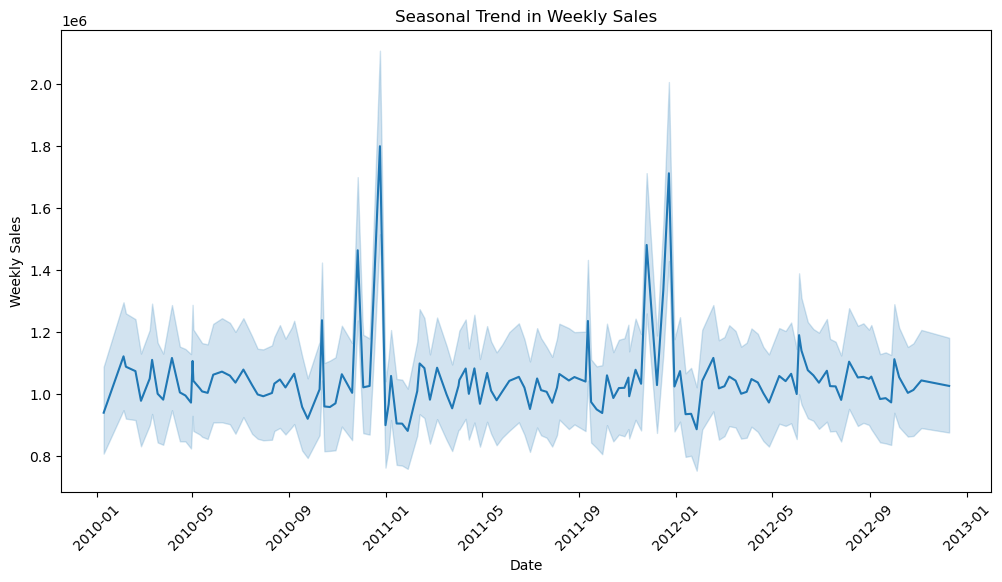

In [55]:
# Create a line plot to show the seasonal trend in Weekly Sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')
plt.title("Seasonal Trend in Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.show()

In [56]:
df.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  weekday  month  year  
0         8.106        6      5  2010  
1         8.106        3     12  2010  
2         8.106        4      2  2010  
3         8.106        4      2  2010  
4         8.106        0      5  2010

In [57]:
df

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1    1643690.90             0        42.31       2.572  211.096358   
1         1    1641957.44             1        38.51       2.548  211.242170   
2         1    1611968.17             0        39.93       2.514  211.289143   
3         1    1409727.59             0        46.63       2.561  211.319643   
4         1    1554806.68             0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6430     45     713173.95             0        64.88       3.997  192.013558   
6431     45     733455.07             0        64.89       3.985  192.170412   
6432     45     734464.36             0        54.47       4.000  192.327265   
6433     45     718125.53             0        56.47       3.969  192.330854   
6434     45     760281.43             0        58.85       3.882  192.308899   

      Unemployment  weekday  month  year  
0            8.106        6      5  2010  
1            8.106        3     12  2010  
2            8.106        4      2  2010  
3            8.106        4      2  2010  
4            8.106        0      5  2010  
...            ...      ...    ...   ...  
6430         8.684        4      9  2012  
6431         8.667        3      5  2012  
6432         8.667        0     12  2012  
6433         8.667        4     10  2012  
6434         8.667        4     10  2012  

[6435 rows x 10 columns]

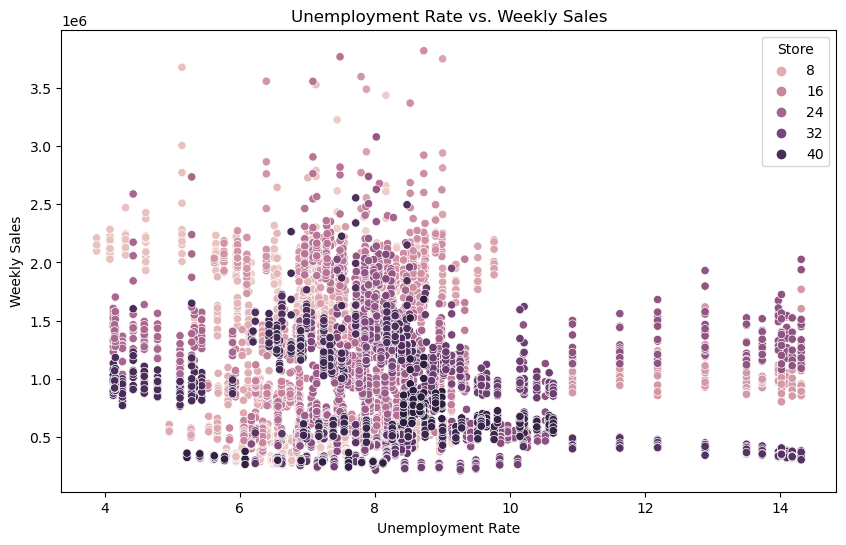

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship between Unemployment Rate and Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', hue='Store')
plt.title("Unemployment Rate vs. Weekly Sales")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.show()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [60]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [61]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 5 categorical features.


In [62]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment      weekday        month         year  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151     3.573427     6.475524  2010.965035  
std      39.356712      1.875885     1.426581     3.321797     0.797019  
min     126.064000      3.879000     0.000000     1.000000  2010.000000  
25%     131.735000      6.891000     4.000000     4.000000  2010.000000  
50%     182.616521      7.874000     4.000000     6.000000  2011.000000  
75%     212.743293      8.622000     4.000000     9.000000  2012.000000  
max     227.232807     14.313000     6.000000    12.000000  2012.000000

## EXPLORATORY DATA ANALYSIS

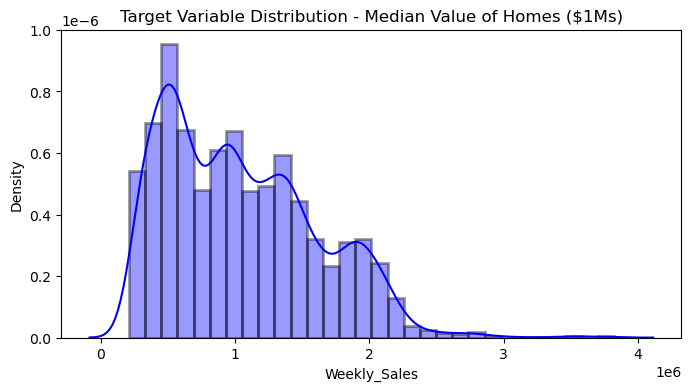

In [63]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

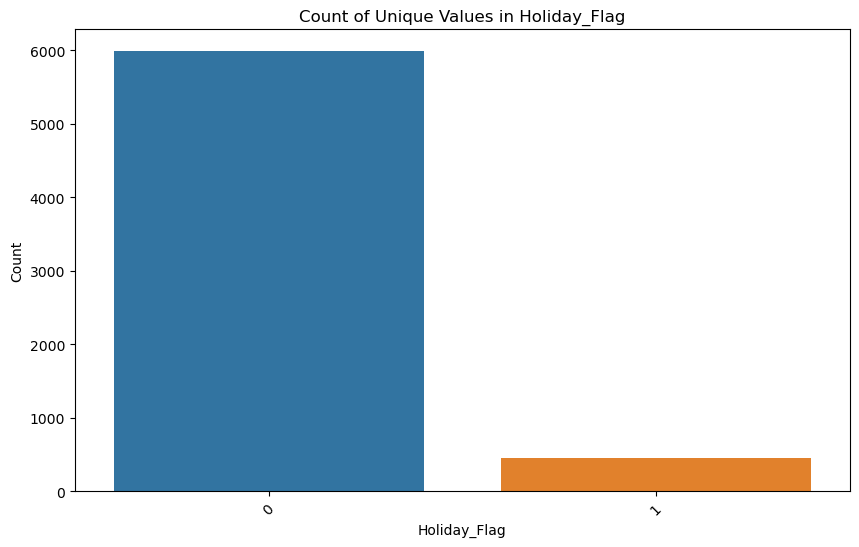

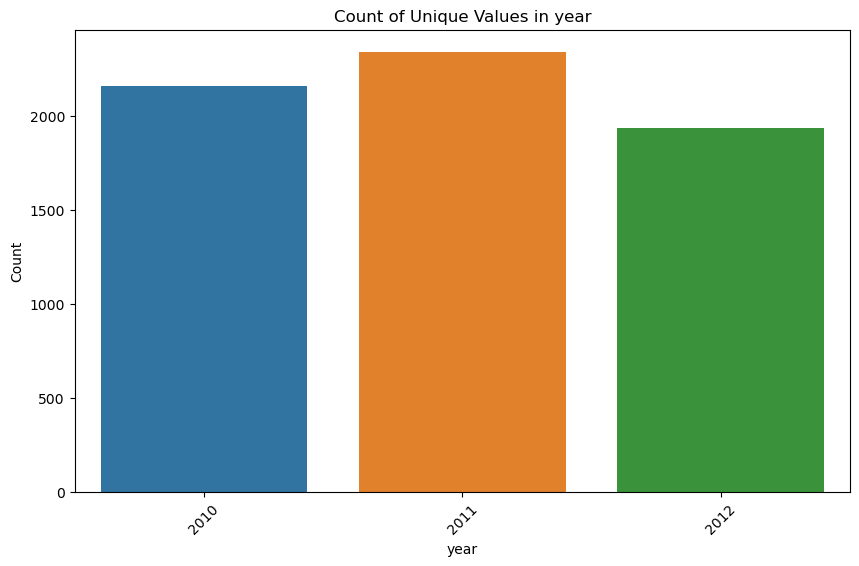

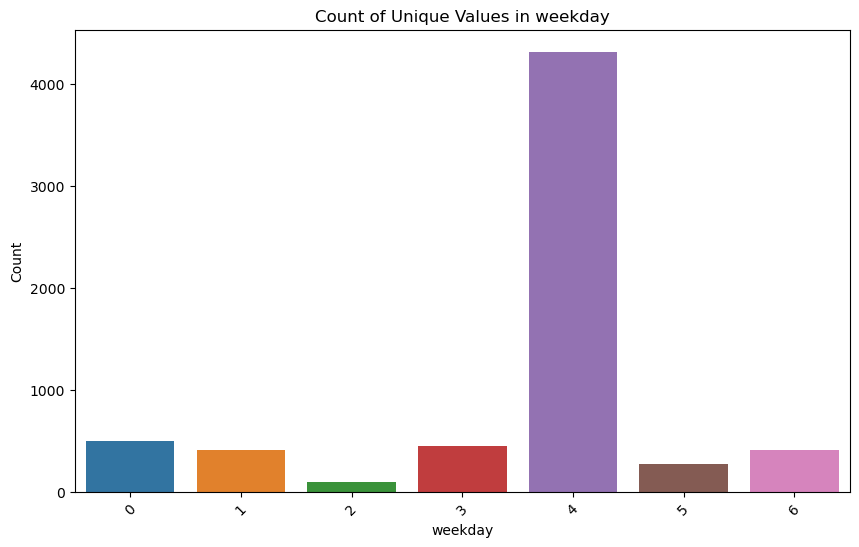

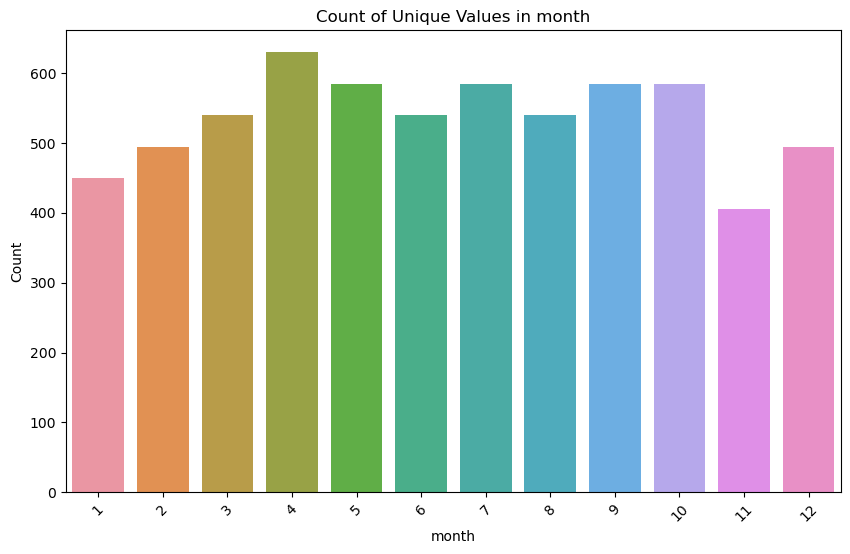

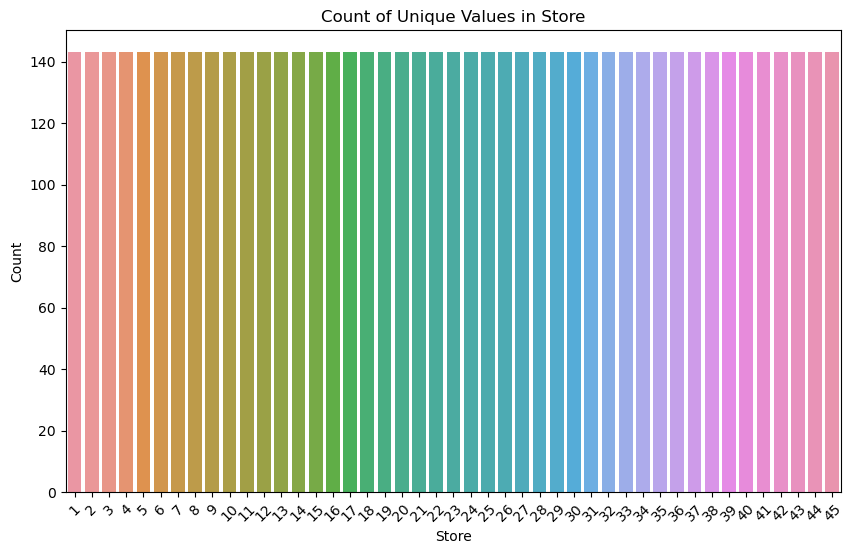

In [64]:
# Select categorical features
categorical_features = ['Holiday_Flag', 'year', 'weekday', 'month', 'Store']

# Loop through and visualize each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of Unique Values in {feature}')
    plt.xticks(rotation=45)
    plt.show()

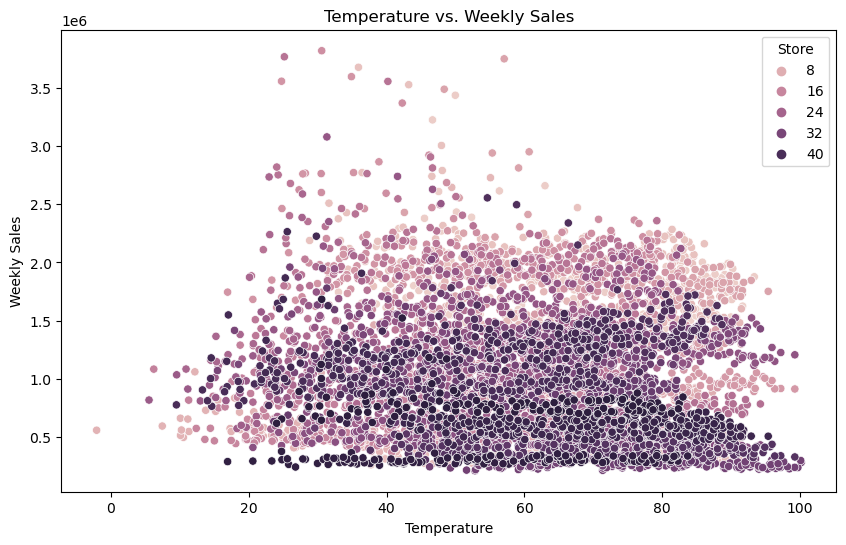

In [65]:
# Scatter plot to visualize the relationship between Temperature and Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Store')
plt.title("Temperature vs. Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

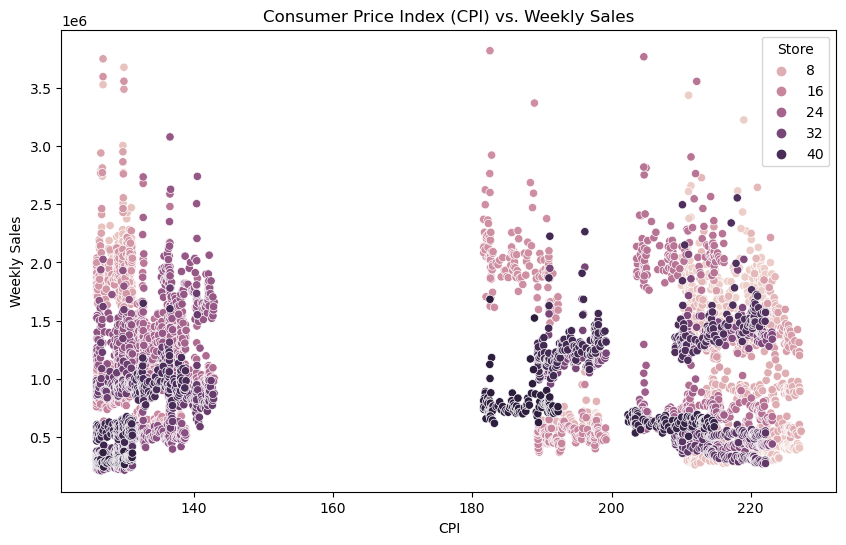

In [66]:
# Scatter plot to visualize the relationship between CPI and Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', hue='Store')
plt.title("Consumer Price Index (CPI) vs. Weekly Sales")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.show()

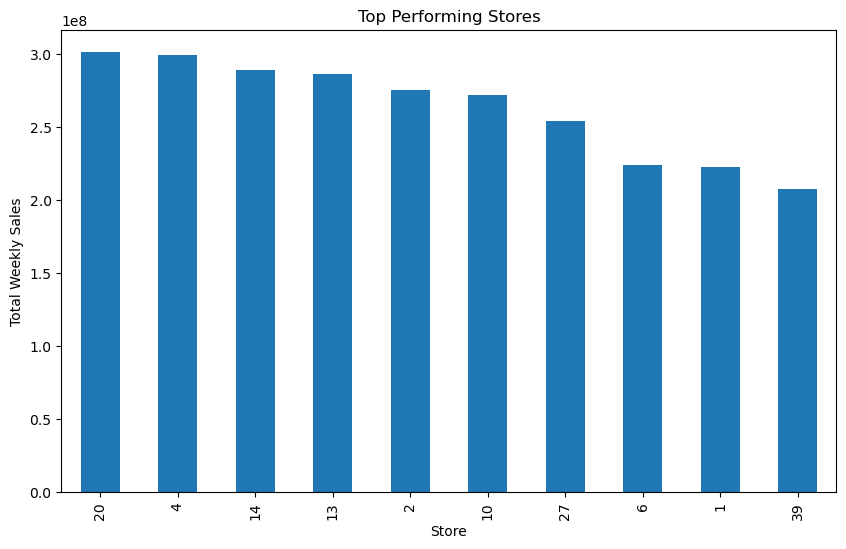

In [67]:
# Calculate the total sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Bar plot to visualize the top performing stores
plt.figure(figsize=(10, 6))
store_sales.head(10).plot(kind='bar')
plt.title("Top Performing Stores")
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.show()

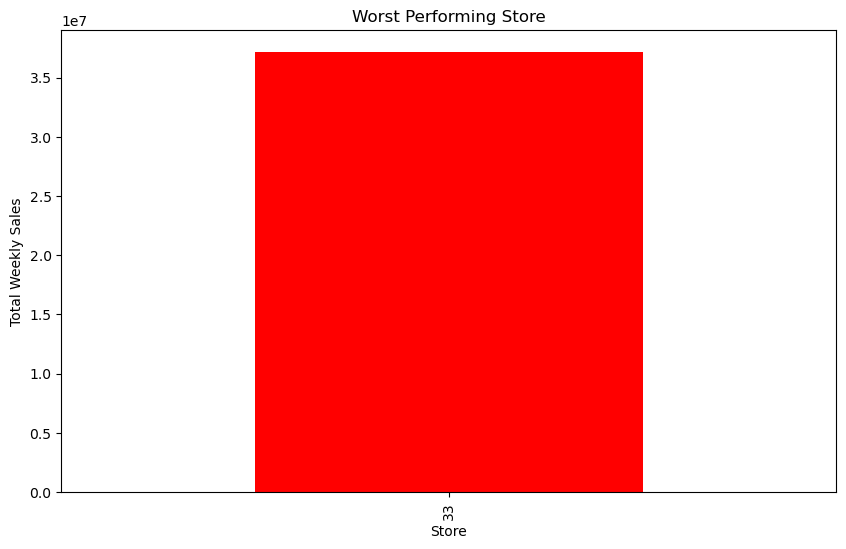

Difference between highest and lowest performing stores: 264237570.49999997


In [68]:
# Bar plot to visualize the worst performing store
plt.figure(figsize=(10, 6))
store_sales.tail(1).plot(kind='bar', color='red')
plt.title("Worst Performing Store")
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.show()

# Calculate the difference between the highest and lowest performing stores
difference = store_sales.max() - store_sales.min()
print("Difference between highest and lowest performing stores:", difference)

In [69]:
# Group the DataFrame by 'Store' and calculate the sum of 'Weekly_Sales' for each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the stores by total weekly sales in descending order (top performers first)
store_sales_sorted = store_sales.sort_values(by='Weekly_Sales', ascending=False)

# Get the top 5 performing stores
top_5_stores = store_sales_sorted.head(5)

# Get the worst 5 performing stores
worst_5_stores = store_sales_sorted.tail(5)

print("Top 5 Performing Stores:")
print(top_5_stores)

print("\nWorst 5 Performing Stores:")
print(worst_5_stores)

Top 5 Performing Stores:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08

Worst 5 Performing Stores:
    Store  Weekly_Sales
37     38   55159626.42
35     36   53412214.97
4       5   45475688.90
43     44   43293087.84
32     33   37160221.96


                                                Numeric Features Distribution                                                 


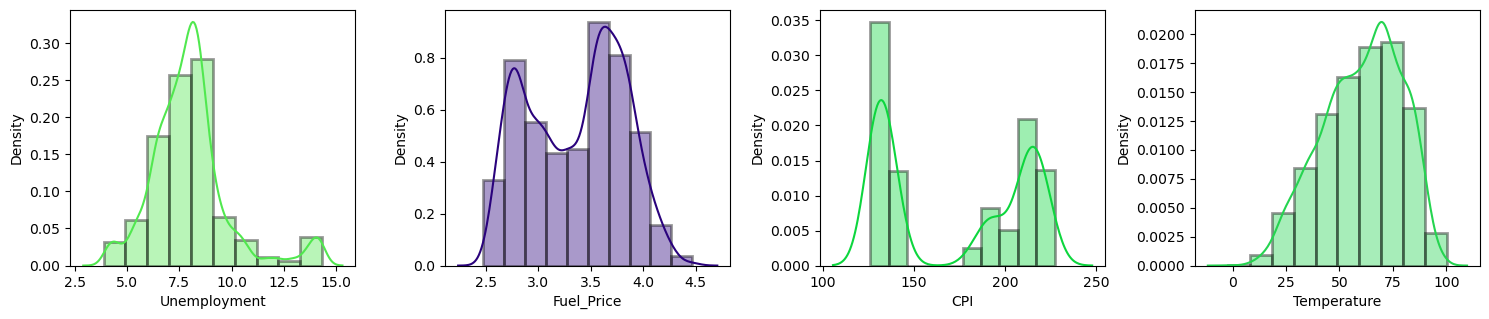

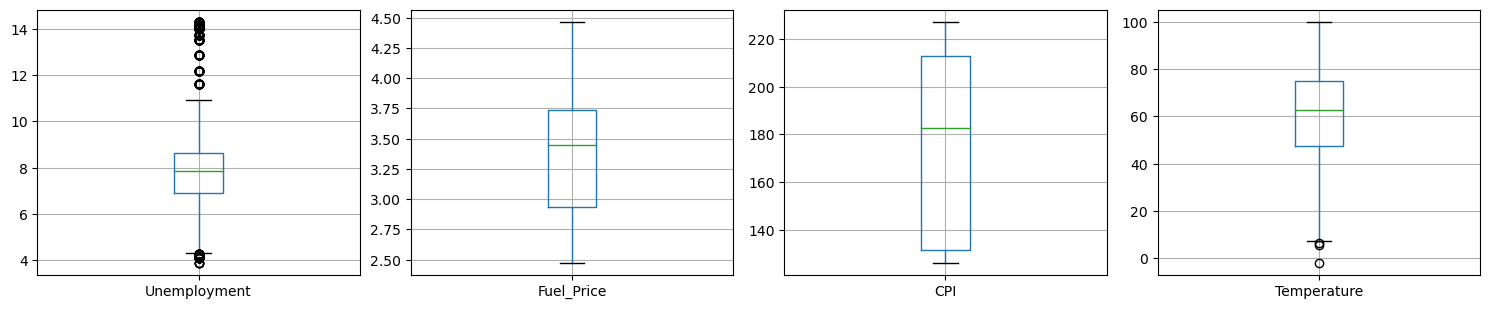

In [70]:
print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

# 3 DATA PROCESSING

In [71]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [72]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

In [73]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


In [74]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
year
weekday
month
Store


(6435, 69)

In [75]:
df

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1    1643690.90             0        42.31       2.572  211.096358   
1         1    1641957.44             1        38.51       2.548  211.242170   
2         1    1611968.17             0        39.93       2.514  211.289143   
3         1    1409727.59             0        46.63       2.561  211.319643   
4         1    1554806.68             0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6430     45     713173.95             0        64.88       3.997  192.013558   
6431     45     733455.07             0        64.89       3.985  192.170412   
6432     45     734464.36             0        54.47       4.000  192.327265   
6433     45     718125.53             0        56.47       3.969  192.330854   
6434     45     760281.43             0        58.85       3.882  192.308899   

      Unemployment  weekday  month  year  
0            8.106        6      5  2010  
1            8.106        3     12  2010  
2            8.106        4      2  2010  
3            8.106        4      2  2010  
4            8.106        0      5  2010  
...            ...      ...    ...   ...  
6430         8.684        4      9  2012  
6431         8.667        3      5  2012  
6432         8.667        0     12  2012  
6433         8.667        4     10  2012  
6434         8.667        4     10  2012  

[6435 rows x 10 columns]

In [76]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0    1643690.90             0        42.31       2.572  211.096358   
1    1641957.44             1        38.51       2.548  211.242170   
2    1611968.17             0        39.93       2.514  211.289143   
3    1409727.59             0        46.63       2.561  211.319643   
4    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  year_2011  year_2012  weekday_1  weekday_2  ...  Store_36  \
0         8.106          0          0          0          0  ...         0   
1         8.106          0          0          0          0  ...         0   
2         8.106          0          0          0          0  ...         0   
3         8.106          0          0          0          0  ...         0   
4         8.106          0          0          0          0  ...         0   

   Store_37  Store_38  Store_39  Store_40  Store_41  Store_42  Store_43  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Store_44  Store_45  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 69 columns]


Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.


In [77]:
df1.T

0             1             2             3     \
Weekly_Sales  1.643691e+06  1.641957e+06  1.611968e+06  1.409728e+06   
Holiday_Flag  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
Temperature   4.231000e+01  3.851000e+01  3.993000e+01  4.663000e+01   
Fuel_Price    2.572000e+00  2.548000e+00  2.514000e+00  2.561000e+00   
CPI           2.110964e+02  2.112422e+02  2.112891e+02  2.113196e+02   
...                    ...           ...           ...           ...   
Store_41      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_42      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_43      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_44      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_45      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                      4             5             6             7     \
Weekly_Sales  1.554807e+06  1.439542e+06  1.472516e+06  1.404430e+06   
Holiday_Flag  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Temperature   4.650000e+01  5.779000e+01  5.458000e+01  5.145000e+01   
Fuel_Price    2.625000e+00  2.667000e+00  2.720000e+00  2.732000e+00   
CPI           2.113501e+02  2.113806e+02  2.112156e+02  2.110180e+02   
...                    ...           ...           ...           ...   
Store_41      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_42      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_43      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_44      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_45      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                      8             9     ...           5943           5944  \
Weekly_Sales  1.594968e+06  1.545419e+06  ...  718232.260000  734297.870000   
Holiday_Flag  0.000000e+00  0.000000e+00  ...       0.000000       0.000000   
Temperature   6.227000e+01  6.586000e+01  ...      72.620000      75.090000   
Fuel_Price    2.719000e+00  2.770000e+00  ...       3.834000       3.867000   
CPI           2.108204e+02  2.106229e+02  ...     191.344887     191.461281   
...                    ...           ...  ...            ...            ...   
Store_41      0.000000e+00  0.000000e+00  ...       0.000000       0.000000   
Store_42      0.000000e+00  0.000000e+00  ...       0.000000       0.000000   
Store_43      0.000000e+00  0.000000e+00  ...       0.000000       0.000000   
Store_44      0.000000e+00  0.000000e+00  ...       0.000000       0.000000   
Store_45      0.000000e+00  0.000000e+00  ...       1.000000       1.000000   

                       5945          5946           5947           5948  \
Weekly_Sales  766512.660000  702238.27000  723086.200000  713173.950000   
Holiday_Flag       1.000000       0.00000       0.000000       0.000000   
Temperature       75.700000      67.87000      65.320000      64.880000   
Fuel_Price         3.911000       3.94800       4.038000       3.997000   
CPI              191.577676     191.69985     191.856704     192.013558   
...                     ...           ...            ...            ...   
Store_41           0.000000       0.00000       0.000000       0.000000   
Store_42           0.000000       0.00000       0.000000       0.000000   
Store_43           0.000000       0.00000       0.000000       0.000000   
Store_44           0.000000       0.00000       0.000000       0.000000   
Store_45           1.000000       1.00000       1.000000       1.000000   

                       5949           5950           5951           5952  
Weekly_Sales  733455.070000  734464.360000  718125.530000  760281.430000  
Holiday_Flag       0.000000       0.000000       0.000000       0.000000  
Temperature       64.890000      54.470000      56.470000      58.850000  
Fuel_Price         3.985000       4.000000       3.969000       3.882000  
CPI              192.170412     192.327265     192.330854     192.3

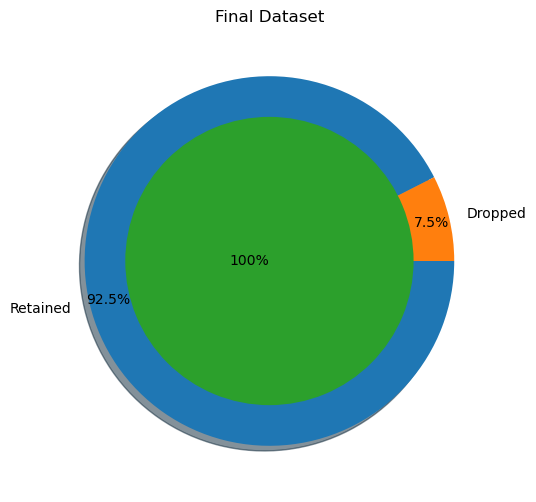


Inference: After the cleanup process, 482 samples were dropped, while retaining 7.49% of the data.


In [78]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

# data manipulation

In [79]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5953, 68) (5953,) 
Training set  --->  (4762, 68) (4762,) 
Testing set   --->  (1191, 68)  (1191,)


In [80]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


Holiday_Flag   Temperature    Fuel_Price           CPI  Unemployment  \
count  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean  -1.492110e-18 -1.305596e-16 -2.991680e-16 -2.762268e-16 -4.267434e-16   
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min   -2.742012e-01 -2.961575e+00 -1.871814e+00 -1.248731e+00 -2.762670e+00   
25%   -2.742012e-01 -7.314248e-01 -9.886990e-01 -1.076949e+00 -6.783836e-01   
50%   -2.742012e-01  1.062547e-01  1.663112e-01  3.842133e-01  9.596435e-02   
75%   -2.742012e-01  7.731979e-01  8.427860e-01  9.933828e-01  6.138095e-01   
max    3.646958e+00  2.170008e+00  2.469806e+00  1.340791e+00  2.575491e+00   

          year_2011     year_2012     weekday_1     weekday_2     weekday_3  \
count  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean  -5.520807e-17  1.939743e-17  4.513632e-17  1.492110e-18 -3.245339e-17   
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min   -7.526270e-01 -6.371530e-01 -2.588345e-01 -1.157891e-01 -2.719813e-01   
25%   -7.526270e-01 -6.371530e-01 -2.588345e-01 -1.157891e-01 -2.719813e-01   
50%   -7.526270e-01 -6.371530e-01 -2.588345e-01 -1.157891e-01 -2.719813e-01   
75%    1.328679e+00  1.569482e+00 -2.588345e-01 -1.157891e-01 -2.719813e-01   
max    1.328679e+00  1.569482e+00  3.863473e+00  8.636394e+00  3.676723e+00   

       ...      Store_36      Store_37      Store_38      Store_39  \
count  ...  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean   ...  1.529413e-17  4.923963e-17  8.952659e-18  1.342899e-17   
std    ...  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min    ... -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01   
25%    ... -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01   
50%    ... -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01   
75%    ... -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01   
max    ...  6.356783e+00  6.300861e+00  2.298067e+01  6.328643e+00   

           Store_40      Store_41      Store_42      Store_43      Store_44  \
count  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean  -3.730275e-18 -1.492110e-17  3.730275e-17 -2.984220e-17 -4.774752e-17   
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min   -1.307162e-01 -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01   
25%   -1.307162e-01 -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01   
50%   -1.307162e-01 -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01   
75%   -1.307162e-01 -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01   
max    7.650163e+00  6.503146e+00  6.356783e+00  6.141290e+00  6.443435e+00   

           Store_45  
count  4.762000e+03  
mean   2.499284e-17  
std    1.000105e+00  
min   -1.523346e-01  
25%   -1.523346e-01  
50%   -1.523346e-01  
75%   -1.523346e-01  
max    6.564495e+00  

[8 rows x 68 columns]


                                          Standardardization on Testing set                                          


Holiday_Flag  Temperature   Fuel_Price          CPI  Unemployment  \
count   1191.000000  1191.000000  1191.000000  1191.000000   1191.000000   
mean       0.005646     0.044406     0.075113     0.021041     -0.050953   
std        1.009885     1.000220     0.971917     1.004644      1.010206   
min       -0.274201    -2.857425    -1.780457    -1.248731     -2.762670   
25%       -0.274201    -0.657516    -0.852751    -1.077025     -0.699355   
50%       -0.274201     0.187351     0.298996     0.393492      0.058860   
75%       -0.274201     0.818764     0.844961     1.019967      0.611390   
max        3.646958     2.035481     2.469806     1.345814      2.575491   

         year_2011    year_2012    weekday_1    weekday_2    weekday_3  ...  \
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000  ...   
mean      0.052984     0.065042     0.007679     0.038532     0.026409  ...   
std       1.014188     1.028250     1.014142     1.152364     1.044095  ...   
min      -0.752627    -0.637153    -0.258834    -0.115789    -0.271981  ...   
25%      -0.752627    -0.637153    -0.258834    -0.115789    -0.271981  ...   
50%      -0.752627    -0.637153    -0.258834    -0.115789    -0.271981  ...   
75%       1.328679     1.569482    -0.258834    -0.115789    -0.271981  ...   
max       1.328679     1.569482     3.863473     8.636394     3.676723  ...   

          Store_36     Store_37     Store_38     Store_39     Store_40  \
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000   
mean     -0.004168    -0.017693     0.111140    -0.010959    -0.000055   
std       0.987401     0.944330     1.881448     0.965939     1.000214   
min      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
25%      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
50%      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
75%      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
max       6.356783     6.300861    22.980668     6.328643     7.650163   

          Store_41     Store_42     Store_43     Store_44     Store_45  
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000  
mean      0.030677    -0.004168    -0.056970     0.016556     0.045053  
std       1.093088     0.987401     0.810380     1.051077     1.134875  
min      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
25%      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
50%      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
75%      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
max       6.503146     6.356783     6.141290     6.443435     6.564495  

[8 rows x 68 columns]

# FEATURES EXTRACTION

                                       Correlation Matrix                                       


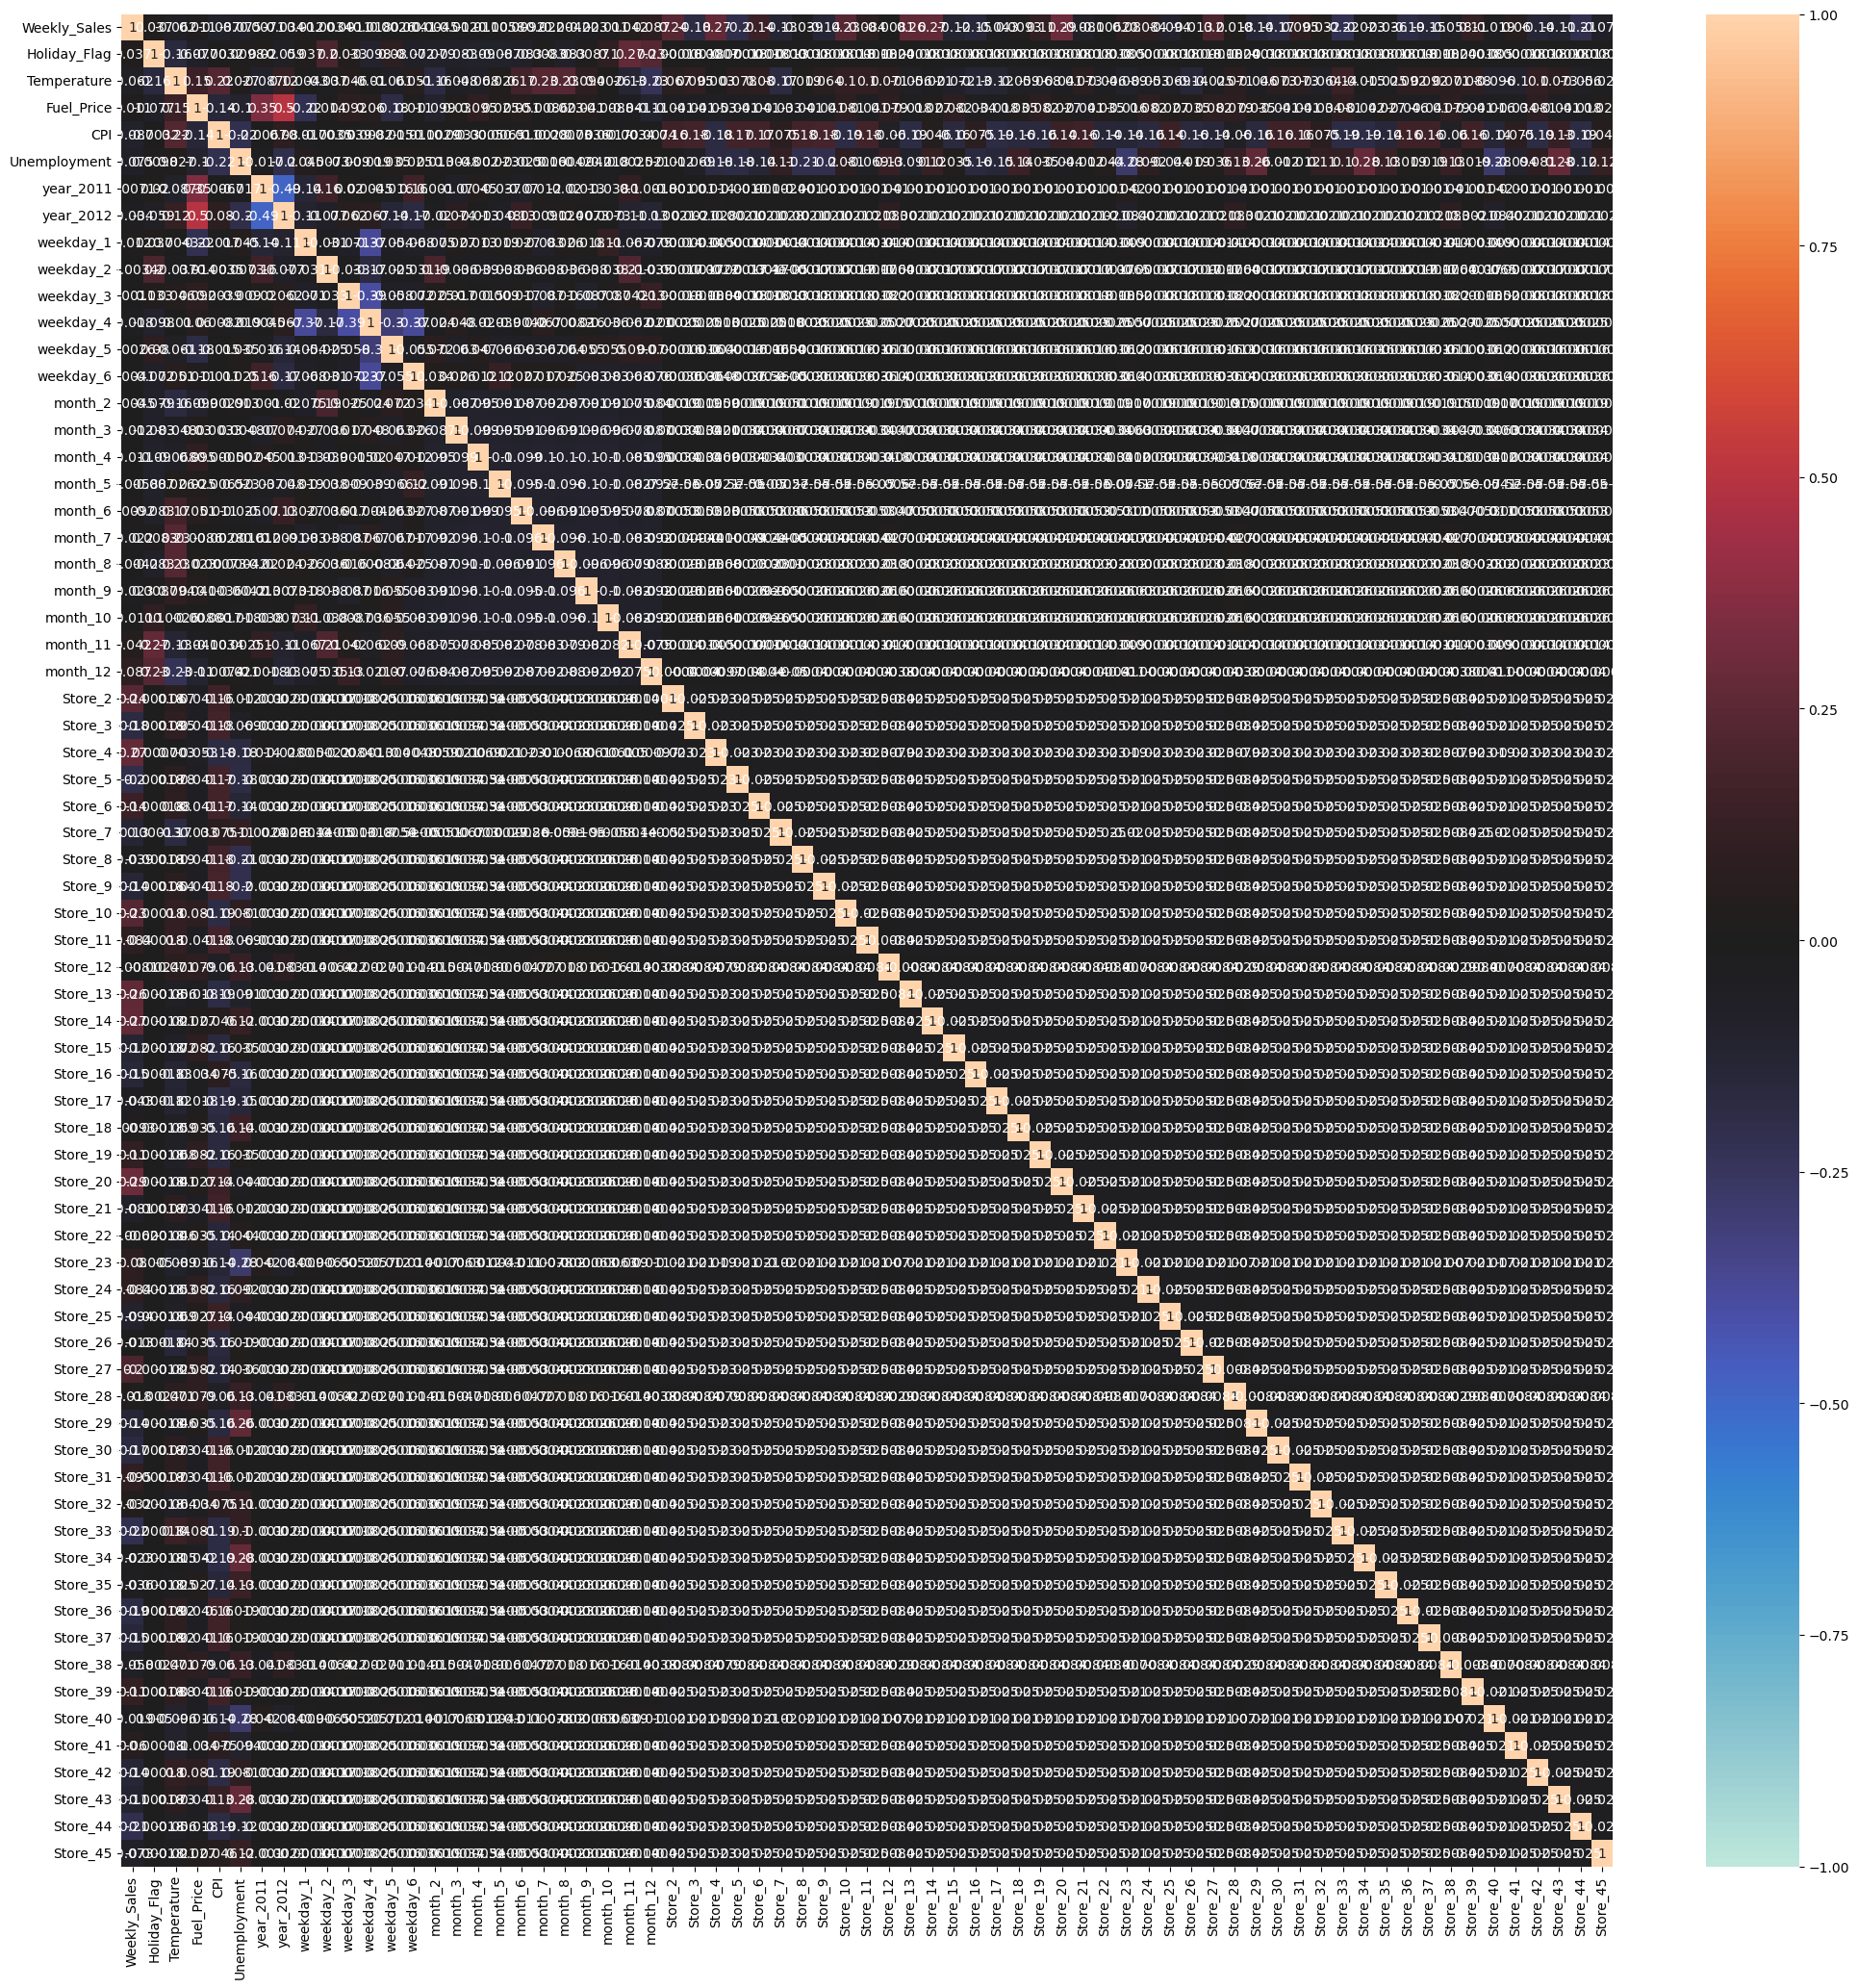

In [81]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,25])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [82]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     958.4
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:00:33   Log-Likelihood:                -63430.
No. Observations:                4762   AIC:                         1.270e+05
Df Residuals:                    4693   BIC:                         1.274e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.048e+06   2152.234    486.752      0.000    1.04e+06    1.05e+06
Holiday_Flag  3435.7934   2436.850      1.410      0.159   -1341.577    8213.164
Temperature  -1.091e+04   3611.329     -3.022      0.003    -1.8e+04   -3834.746
Fuel_Price    4743.1404   6083.604      0.780      0.436   -7183.581    1.67e+04
CPI           4.806e+05   6.53e+04      7.359      0.000    3.53e+05    6.09e+05
Unemployment -6.096e+04   7305.771     -8.344      0.000   -7.53e+04   -4.66e+04
year_2011    -3.085e+04   6385.220     -4.832      0.000   -4.34e+04   -1.83e+04
year_2012    -7.005e+04   8794.662     -7.965      0.000   -8.73e+04   -5.28e+04
weekday_1     5298.1880   3028.935      1.749      0.080    -639.948    1.12e+04
weekday_2    -1.144e+04   2552.678     -4.481      0.000   -1.64e+04   -6435.135
weekday_3    -1.397e+04   3035.015     -4.603      0.000   -1.99e+04   -8021.037
weekday_4    -1.668e+04   4056.274     -4.113      0.000   -2.46e+04   -8730.185
weekday_5    -1.288e+04   2827.562     -4.555      0.000   -1.84e+04   -7335.388
weekday_6    -2292.8321   3074.313     -0.746      0.456   -8319.930    3734.265
month_2       2.869e+04   3169.875      9.050      0.000    2.25e+04    3.49e+04
month_3       2.018e+04   3233.395      6.243      0.000    1.38e+04    2.65e+04
month_4       2.099e+04   3462.153      6.062      0.000    1.42e+04    2.78e+04
month_5       2.214e+04   3478.401      6.364      0.000    1.53e+04     2.9e+04
month_6       3.159e+04   3270.641      9.659      0.000    2.52e+04     3.8e+04
month_7       1.905e+04   3478.984      5.474      0.000    1.22e+04    2.59e+04
month_8       2.445e+04   3357.585      7.282      0.000    1.79e+04     3.1e+04
month_9       1.231e+04   3456.199      3.561      0.000    5531.812    1.91e+04
month_10      1.696e+04   3519.751      4.820      0.000    1.01e+04    2.39e+04
month_11      4.132e+04   3243.964     12.736      0.000     3.5e+04    4.77e+04
month_12      6.241e+04   3556.769     17.546      0.000    5.54e+04    6.94e+04
Store_2       5.522e+04   2977.883     18.545      0.000    4.94e+04    6.11e+04
Store_3      -1.841e+05   3122.600    -58.973      0.000    -1.9e+05   -1.78e+05
Store_4       2.173e+05   2.14e+04     10.161      0.000    1.75e+05    2.59e+05
Store_5      -1.914e+05   3140.260    -60.961      0.000   -1.98e+05   -1.85e+05
Store_6      -9300.0797   3167.398     -2.936      0.003   -1.55e+04   -3090.492
Store_7      -1.058e+05   6373.008    -16.605      0.000   -1.18e+05   -9.33e+04
Store_8       -1.21e+05   3457.789    -34.980      0.000   -1.28e+05   -1.14e+05
Store_9      -1.635e+05   3269.593    -50.014      0.000    -1.7e+05   -1.57e+05
Store_10       2.18e+05   2.21e+04      9.844      0.000    1.75e+05    2.61e+05
Store_11     -4.043e+04   3138.072    -12.885      0.000   -4.66e+04   -3.43e+04
Store

# REMOVAL OF MULTICOLINEARTY

Dropped Features -->  ['CPI', 'Unemployment', 'Fuel_Price', 'weekday_4', 'month_7', 'Store_7', 'Temperature', 'month_12', 'Store_43', 'year_2012', 'Store_30', 'month_2', 'month_11', 'Store_16', 'month_5', 'Store_25', 'Store_29', 'month_10', 'Store_17', 'Holiday_Flag', 'Store_18', 'year_2011', 'Store_19', 'month_9', 'Store_20', 'Store_8', 'Store_34', 'Store_15', 'Store_22', 'month_6', 'Store_21', 'Store_35', 'Store_14', 'Store_13', 'Store_45', 'Store_27', 'month_3', 'weekday_1', 'Store_23', 'Store_44', 'Store_42', 'Store_11', 'weekday_5', 'Store_39', 'weekday_2', 'weekday_3', 'Store_24', 'Store_41', 'Store_40', 'Store_10', 'Store_36', 'Store_9', 'month_4', 'Store_2', 'Store_3', 'Store_6']


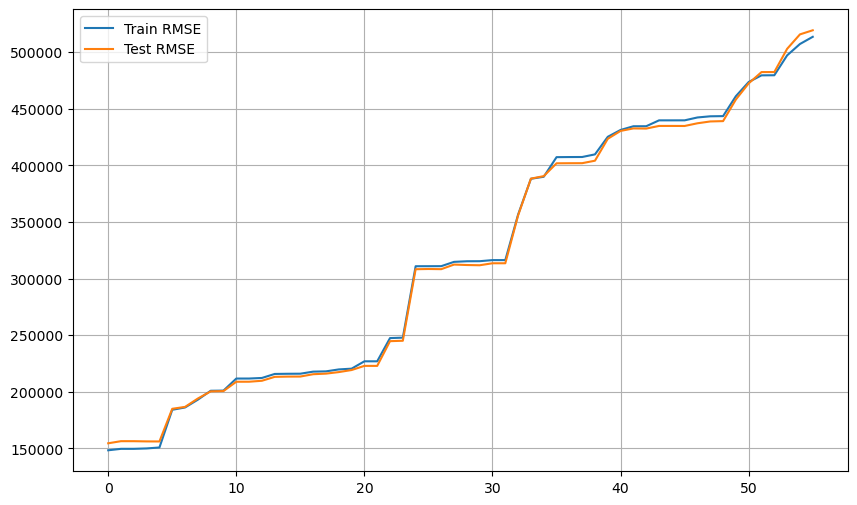

In [85]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

DROP=[];b=[]
for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        
print('Dropped Features --> ',DROP)


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

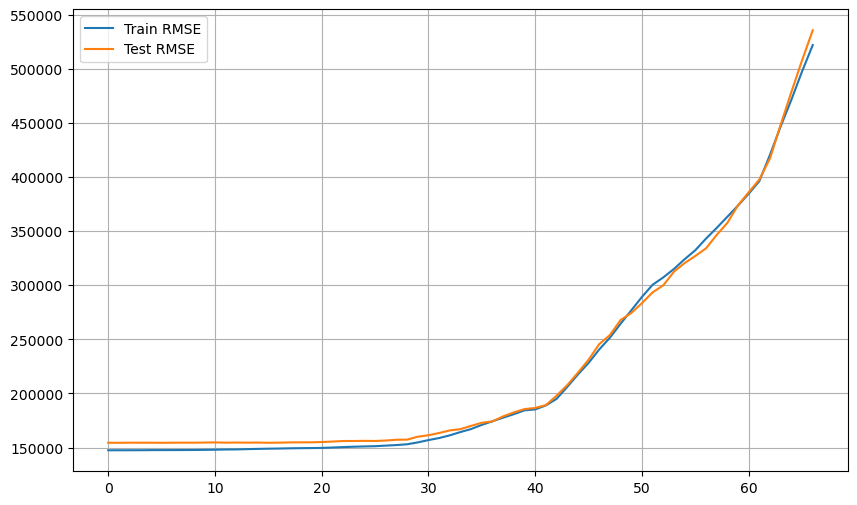

In [86]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()


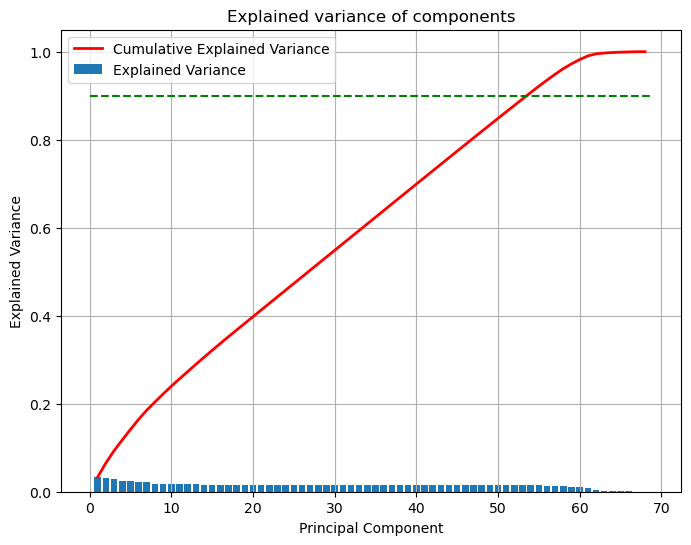

In [87]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

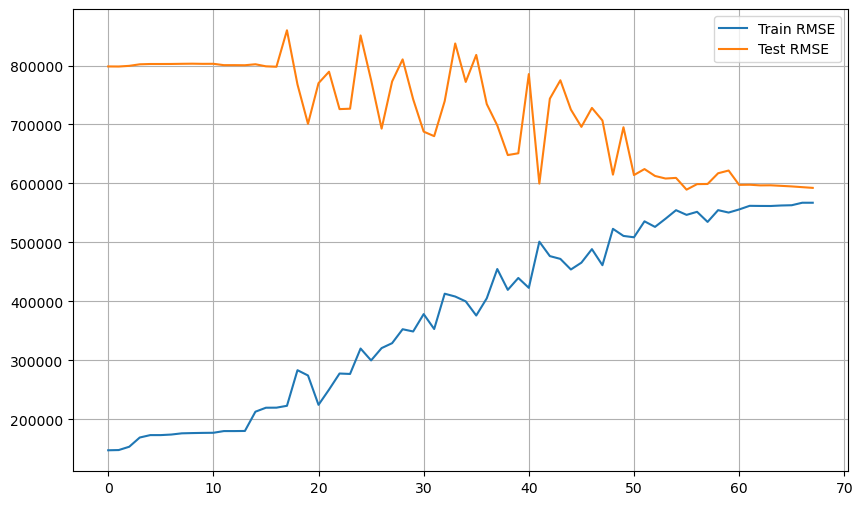

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

## DEFINE VARIABLES AND LIST

Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

#Iterating through features and fitting models:


for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)
    
#Predict and evaluate:


    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

##Plotting results:


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()


In [89]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-28)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]


152984.3455868294
157283.79051514962


# predictive modelling

In [90]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()
#Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))
    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)
# Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()


<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


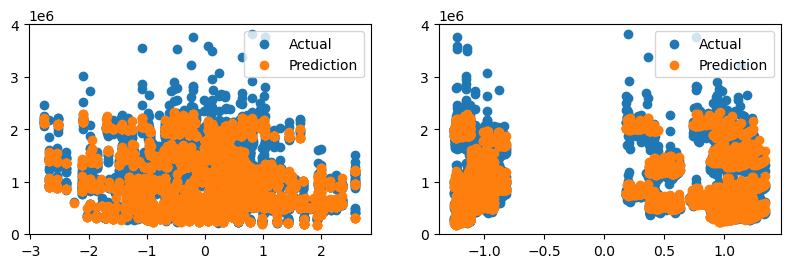



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9276826744775732
Residual Sum of Squares (RSS) on Training set  ---> 111450847994430.22
Mean Squared Error (MSE) on Training set       ---> 23404209994.630455
Root Mean Squared Error (RMSE) on Training set ---> 152984.3455868294

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.927676279121959
Residual Sum of Squares (RSS) on Training set  ---> 29463185193746.844
Mean Squared Error (MSE) on Training set       ---> 24738190758.81347
Root Mean Squared Error (RMSE) on Training set ---> 157283.79051514962

--------------------Residual Plots--------------------


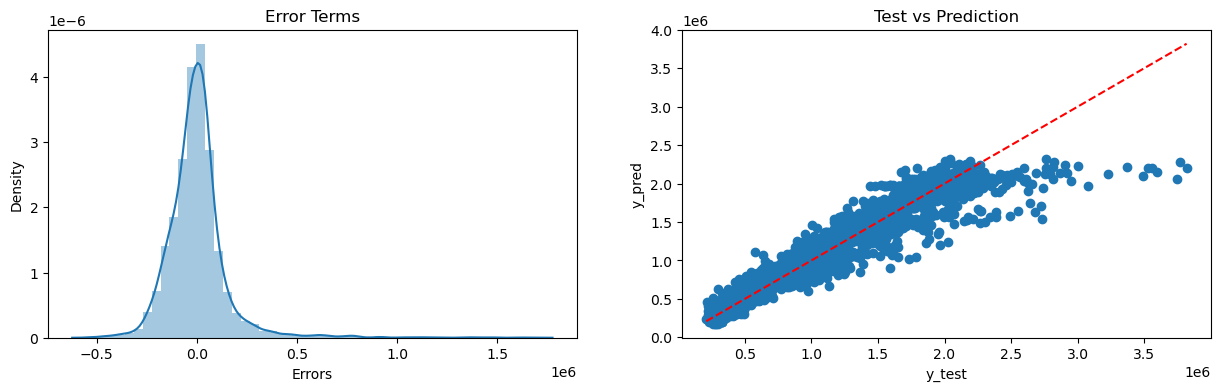

In [91]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

In [92]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Walmart DataSet.csv")

# Convert 'Date' to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Group by 'Store' and resample to weekly frequency
store_weekly_sales = data.groupby('Store')['Weekly_Sales'].resample('W').sum()

# Select a specific store for forecasting (you can loop through all stores)
selected_store = 1
store_sales = store_weekly_sales[selected_store]

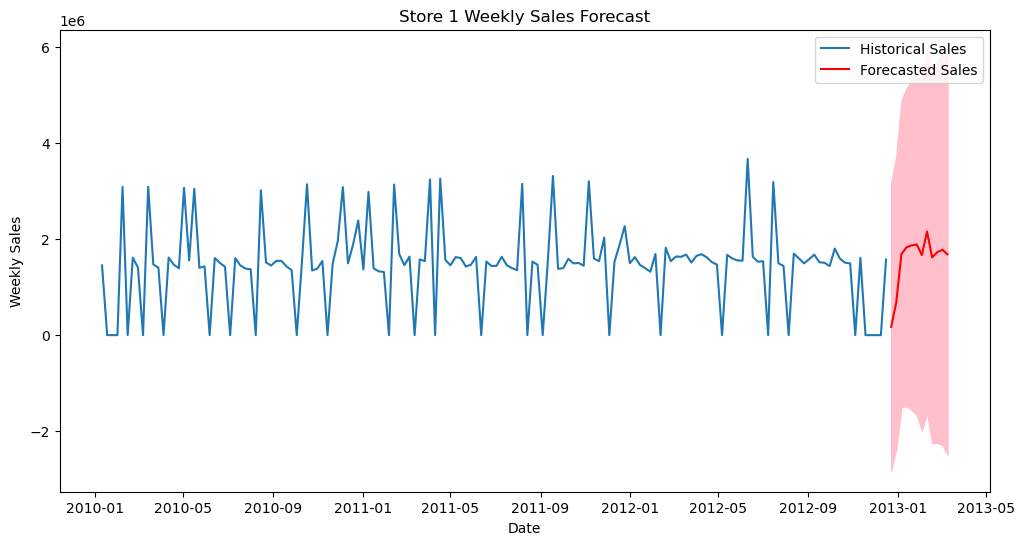

In [93]:
# Define the SARIMA model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 52)  # (P, D, Q, S)
model = SARIMAX(store_sales, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)

# Fit the model
result = model.fit()

# Forecast for the next 12 weeks
forecast_steps = 12
forecast = result.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=store_sales.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the historical sales and forecast
plt.figure(figsize=(12, 6))
plt.plot(store_sales.index, store_sales, label='Historical Sales')
plt.plot(forecast_dates, forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink')
plt.title(f"Store {selected_store} Weekly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()